# Hard level

Рассмотрим логистическое отображение
$$
x_{n+1} = f(x_n) = r x_n (1 - x_n), \quad 0 < x_0 < 1,\; 0 \le r \le 4.
$$

### Определения

**Неподвижная точка кратности $m$.**  
Точка $x_1^*$ называется неподвижной точкой кратности $m$, если при $m$-кратном применении отображения $f$ она возвращается в себя:
$$
f^{(m)}(x_1^*) = x_1^*,
$$
и при этом точки
$$
x_1^*, x_2^*, \dots, x_m^*
$$
попарно различны:
$$
x_i^* \ne x_j^*, \quad i \ne j.
$$

Последовательность $(x_1^*, x_2^*, \dots, x_m^*)$, для которой
$$
x_{k+1}^* = f(x_k^*), \quad x_1^* = f(x_m^*),
$$
называется **циклом порядка (длины) $m$**.
Каждая точка цикла является неподвижной точкой кратности $m$.

Известно, что при увеличении параметра $r$ логистическое отображение проходит последовательность бифуркаций:  
фиксированная точка $\Rightarrow$ цикл длины 2 $\Rightarrow$ цикл длины 4 $\Rightarrow$ цикл длины 8 и т.д., а затем начинается хаотический режим. Число
$$
r_\infty \approx 3.5699456\dots
$$
является границей между регулярной (периодической) и хаотической динамикой.


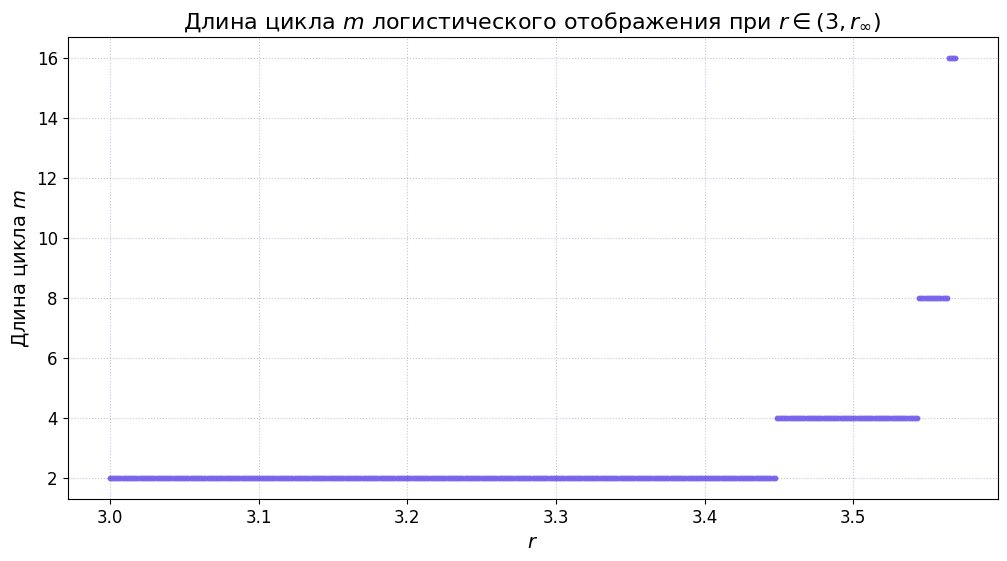

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    """
    Вычисляет одно итерацию логистического отображения.
    
    Параметры:
    ----------
    x : float
        Текущее значение последовательности
    r : float
        Параметр логистического отображения
    
    Возвращает:
    -----------
    float
        Следующее значение последовательности: r * x * (1 - x)
    """
    return r * x * (1 - x)

def logistic_orbit(r, x0=0.5, n_iter=2000):
    """
    Генерирует орбиту логистического отображения.
    
    Параметры:
    ----------
    r : float
        Параметр логистического отображения
    x0 : float, optional
        Начальное значение (по умолчанию 0.5)
    n_iter : int, optional
        Количество итераций (по умолчанию 2000)
    
    Возвращает:
    -----------
    x : numpy.ndarray
        Массив значений орбиты длины n_iter
    """
    x = np.empty(n_iter)
    x[0] = x0
    for i in range(1, n_iter):
        x[i] = logistic_map(x[i-1], r)
    return x

def detect_period_tail(xs, max_m=64, tail_len=512, tol=1e-5):
    """
    Определяет период последовательности по её хвосту.
    
    Параметры:
    ----------
    xs : numpy.ndarray
        Последовательность значений
    max_m : int, optional
        Максимальная длина периода для поиска (по умолчанию 64)
    tail_len : int, optional
        Длина хвоста последовательности для анализа (по умолчанию 512)
    tol : float, optional
        Допустимая погрешность для сравнения значений (по умолчанию 1e-5)
    
    Возвращает:
    -----------
    int
        Длина периода, если найден, иначе 0 (хаос или слишком длинный период)
    """
    tail = xs[-tail_len:]
    N = len(tail)

    for m in range(1, max_m + 1):
        ok = True
        for k in range(m, N):
            if abs(tail[k] - tail[k - m]) > tol:
                ok = False
                break
        if ok:
            return m
    return 0

r_infty = 3.5699456
r_values = np.linspace(3.0, r_infty, 400)
cycle_lengths = []

for r in r_values:
    orbit = logistic_orbit(r, x0=0.5, n_iter=3000)
    m = detect_period_tail(orbit, max_m=128, tail_len=512, tol=1e-5)
    cycle_lengths.append(m)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12, 6))

# Используем сине-фиолетовый цвет (medium slate blue)
cycle_lengths = np.array(cycle_lengths)
mask = cycle_lengths > 0
plt.scatter(r_values[mask], cycle_lengths[mask], s=10, color='#7B68EE')

plt.xlabel(r'$r$', fontsize=14)
plt.ylabel(r'Длина цикла $m$', fontsize=14)
plt.title(r'Длина цикла $m$ логистического отображения при $r \in (3, r_\infty)$', fontsize=16)
plt.grid(True, alpha=0.3, color='#483D8B', linestyle=':')
plt.show()



Из полученного графика видно, что при $r \in (3, r_\infty)$:

- при увеличении $r$ длина цикла $m$ последовательно принимает значения
  $$
  m = 2, 4, 8, 16, \dots
  $$
- то есть длина циклов возрастает по степеням двойки: $m = 2^k$ (для $k \ge 1$).

**Ответ на вопрос 1.**  
При $r \in (3, r_\infty)$ длина цикла логистического отображения увеличивается скачкообразно (удвоение периода):  
цикл периода 2 → 4 → 8 → …, пока не происходит переход к хаосу.

**Ответ на вопрос 2.**  
Экспериментально установлено, что возможные длины циклов в этом диапазоне имеют вид
$$
m = 2^k,\quad k = 1,2,3,\dots
$$
то есть длина циклов ограничена значениями, являющимися степенями двойки.



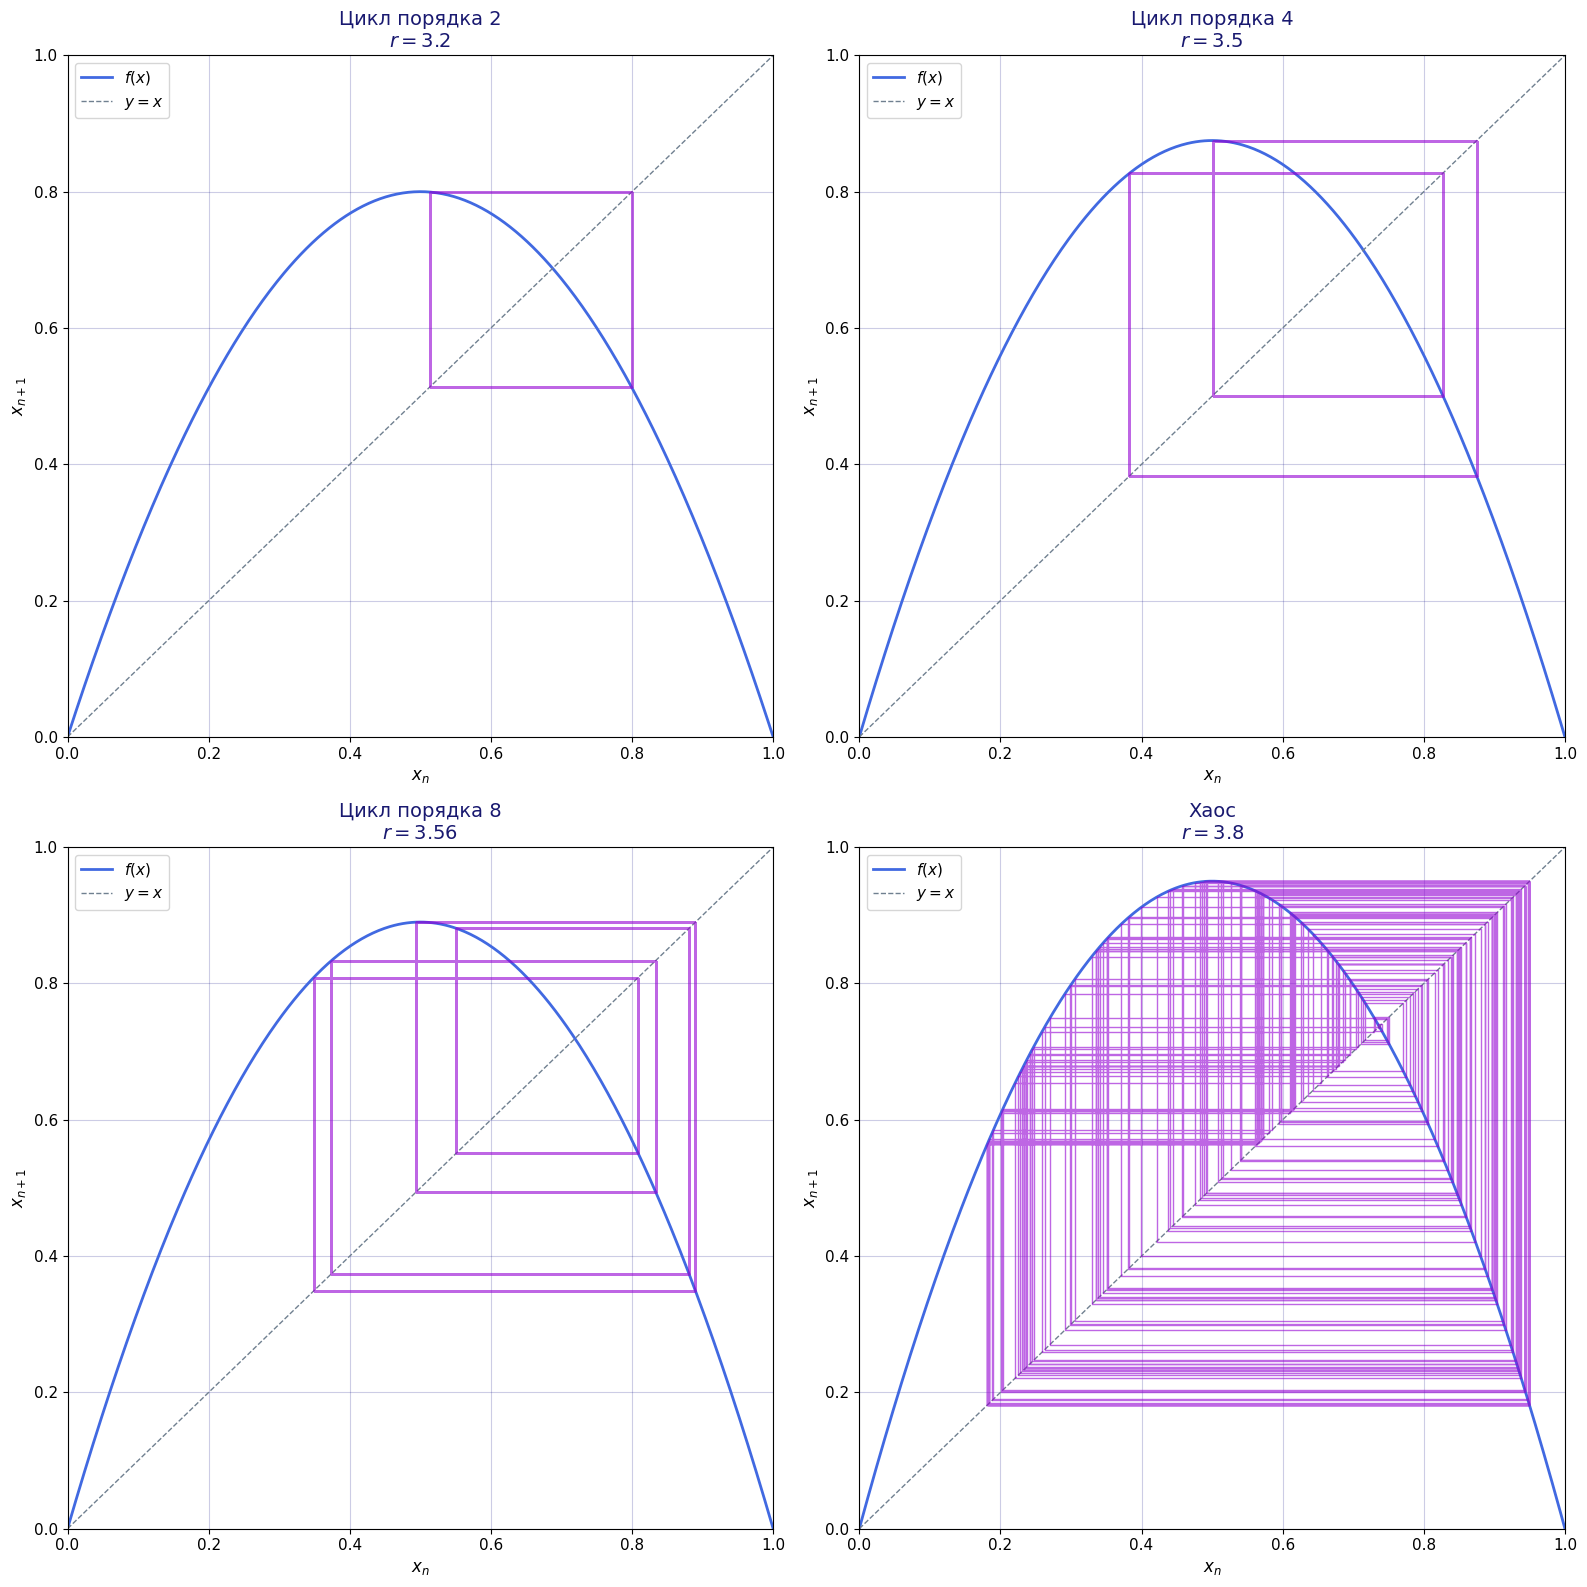

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_f(x, r):
    """
    Вычисляет одно итерацию логистического отображения.
    
    Параметры:
    ----------
    x : float
        Текущее значение последовательности
    r : float
        Параметр логистического отображения
    
    Возвращает:
    -----------
    float
        Следующее значение последовательности: r * x * (1 - x)
    """
    return r * x * (1 - x)

def plot_lamerey_staircase(r, x0=0.2, n_transient=100, n_steps=100, ax=None):
    """
    Строит лестницу Ламерея для заданного параметра r.
    
    Параметры:
    ----------
    r : float
        Параметр логистического отображения
    x0 : float
        Начальная точка (по умолчанию 0.2)
    n_transient : int
        Количество переходных итераций перед построением лестницы
    n_steps : int
        Количество шагов лестницы для отображения
    ax : matplotlib.axes.Axes, optional
        Оси для построения. Если None, создаются новые.
    
    Возвращает:
    -----------
    ax : matplotlib.axes.Axes
        Оси с построенным графиком
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    
    # Построение функции f(x) и прямой y=x
    x = np.linspace(0, 1, 500)
    y = logistic_f(x, r)
    
    # Функция (RoyalBlue)
    ax.plot(x, y, color='#4169E1', linewidth=2, label=r'$f(x)$')
    # y=x (SlateGray)
    ax.plot(x, x, linestyle='--', color='#708090', linewidth=1, label=r'$y=x$')
    
    # Пропустим переходные итерации
    xn = x0
    for _ in range(n_transient):
        xn = logistic_f(xn, r)
    
    # Построение лестницы Ламерея
    curr_x = xn
    plot_xs = []
    plot_ys = []
    
    # Для хаоса рисуем больше точек
    steps = n_steps if r < 3.6 else 200
    
    for _ in range(steps):
        next_y = logistic_f(curr_x, r)
        
        # Вертикаль: от (curr_x, curr_x) до (curr_x, next_y)
        plot_xs.extend([curr_x, curr_x])
        plot_ys.extend([curr_x, next_y])
        
        # Горизонталь: от (curr_x, next_y) до (next_y, next_y)
        plot_xs.extend([curr_x, next_y])
        plot_ys.extend([next_y, next_y])
        
        curr_x = next_y
    
    # Рисуем лестницу (DarkViolet)
    ax.plot(plot_xs, plot_ys, color='#9400D3', alpha=0.6, linewidth=1)
    
    ax.set_title(f'Лестница Ламерея для $r={r}$', fontsize=14, color='#191970')
    ax.set_xlabel(r'$x_n$', fontsize=12)
    ax.set_ylabel(r'$x_{n+1}$', fontsize=12)
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.2, color='#000080')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    return ax

# Демонстрация лестницы Ламерея для разных режимов
r_values = [3.2, 3.5, 3.56, 3.8]
titles = ['Цикл порядка 2', 'Цикл порядка 4', 'Цикл порядка 8', 'Хаос']

plt.rcParams.update({'font.size': 11})
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

for ax, r, title in zip(axes, r_values, titles):
    plot_lamerey_staircase(r, x0=0.2, n_transient=100, n_steps=100, ax=ax)
    ax.set_title(f'{title}\n$r={r}$', fontsize=14, color='#191970')

plt.tight_layout()
plt.show()


На представленных графиках лестницы Ламерея можно наблюдать различия в поведении траекторий:

1.  **Цикл порядка 2 ($r=3.2$):** Лестница вырождается в замкнутый контур, напоминающий прямоугольник. Траектория бесконечно переходит между двумя значениями. Контур состоит из 4 сегментов (2 вертикальных и 2 горизонтальных).

2.  **Цикл порядка 4 ($r=3.5$):** Контур становится сложнее, траектория обходит 4 различные точки перед возвращением. Контур состоит из 8 сегментов.

3.  **Цикл порядка 8 ($r=3.56$):** Контур ещё более сложный, траектория обходит 8 различных точек. Контур состоит из 16 сегментов.

4.  **Хаос ($r=3.8$):** Замкнутого цикла не наблюдается. Лестница Ламерея заполняет значительную часть графика, не повторяя свой путь. Траектория не возвращается в начальную точку.

**Общая закономерность:**  
Для цикла порядка $m$ лестница Ламерея образует замкнутый контур из $2m$ сегментов, проходящий через $m$ различных точек на кривой функции. Каждая точка цикла соответствует пересечению вертикальной линии (из диагонали $y=x$) с кривой функции $f(x)$.

**Вывод:**  
Визуализация с помощью лестницы Ламерея позволяет наглядно отличить периодические режимы (замкнутые фигуры) от хаотических (заполняющие траектории) и оценить сложность цикла (количество вершин в контуре).


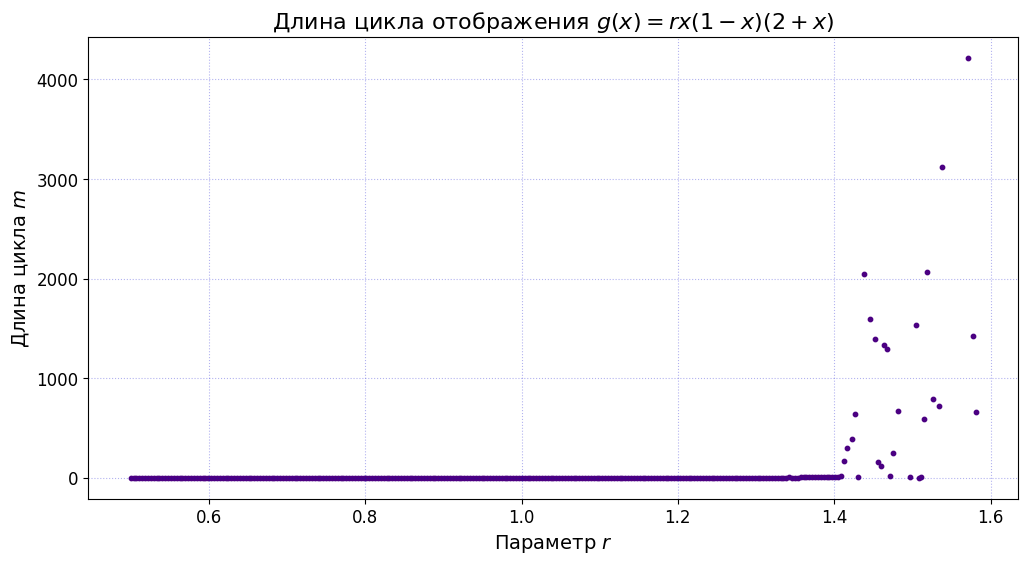

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Отображение g
def g_map(x, r):
    """
    Вычисляет одно итерацию точечного отображения g(x) = r x(1-x)(2+x).
    
    Параметры:
    ----------
    x : float
        Текущее значение последовательности
    r : float
        Параметр отображения
    
    Возвращает:
    -----------
    float
        Следующее значение последовательности или inf при дивергенции
    """
    # Ограничим x, чтобы избежать переполнения при дивергенции
    if abs(x) > 1e5:
        return np.inf
    return r * x * (1 - x) * (2 + x)

# Брент: быстрый поиск периода
def brent_cycle_detection(f, x0, r, max_iter=20000, tol=1e-5):
    """
    Определяет длину цикла последовательности методом Брента.
    
    Параметры:
    ----------
    f : callable
        Функция отображения f(x, r)
    x0 : float
        Начальное значение последовательности
    r : float
        Параметр отображения
    max_iter : int, optional
        Максимальное количество итераций (по умолчанию 20000)
    tol : float, optional
        Допустимая погрешность для сравнения значений (по умолчанию 1e-5)
    
    Возвращает:
    -----------
    int or None
        Длина цикла, если найден, иначе None (хаос или слишком длинный цикл)
    """
    power = lam = 1
    tortoise = x0
    hare = f(x0, r)

    # 1. Находим λ (длину цикла)
    while lam < max_iter:
        if hare == np.inf:  # расходится
            return None
            
        if abs(tortoise - hare) < tol:  # найден цикл
            break
            
        if power == lam:
            tortoise = hare
            power *= 2
            lam = 0
        hare = f(hare, r)
        lam += 1
    
    if lam >= max_iter:
        return None  # хаос или слишком длинный цикл

    # 2. mu пропускаем для скорости, нам нужна только длина
    return lam

# Ограничим диапазон r до зоны устойчивости и первых бифуркаций (примерно до 1.6)
# При r > 1.6 начинаются расхождения в бесконечность
r_values = np.linspace(0.5, 1.6, 300)
cycle_lengths = []

for r in r_values:
    # Стартуем близко к 0.5, чтобы попасть в аттрактор
    lam = brent_cycle_detection(g_map, x0=0.6, r=r, max_iter=5000, tol=1e-5)
    if lam is None:
        cycle_lengths.append(0)
    else:
        cycle_lengths.append(lam)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12, 6))

# Цвет индиго
cycle_lengths = np.array(cycle_lengths)
mask = cycle_lengths > 0
plt.scatter(r_values[mask], cycle_lengths[mask], s=10, color='#4B0082')

plt.xlabel(r'Параметр $r$', fontsize=14)
plt.ylabel(r'Длина цикла $m$', fontsize=14)
plt.title('Длина цикла отображения $g(x) = r x(1-x)(2+x)$', fontsize=16)
plt.grid(True, alpha=0.3, color='#0000CD', linestyle=':')
plt.show()



Сравним результаты для логистического отображения и для вариационного
отображения
$$
g(x) = r x(1-x)(2+x).
$$

Экспериментально наблюдается:

1. При малых значениях $r$ последовательность сходится к нулю (фиксированной точке).
2. Далее возникает устойчивая неподвижная точка $x^* \ne 0$.
3. При дальнейшем увеличении $r$ начинается каскад бифуркаций:
   длина цикла принимает значения $m = 2, 4, 8, \dots$, то есть вновь появляются циклы
   длины, являющейся степенью двойки.
4. При больших значениях $r$ возникают более сложные режимы (окна периодичности
   и хаотическое поведение), аналогично логистическому отображению.

**Сравнение с логистическим отображением:**

**Сходства:**
- Оба отображения демонстрируют каскад удвоений периода (период удваивается при переходе через критические значения $r$).
- Оба отображения переходят к хаотическому режиму при достаточно больших значениях $r$.
- В обоих случаях возможные длины циклов ограничены степенями двойки: $m = 2^k$ для $k = 1, 2, 3, \ldots$
- Оба отображения показывают окна периодичности в хаотической области.

**Отличия:**
- Критические значения параметра $r$, при которых происходят бифуркации, различны для двух отображений.
- Для логистического отображения переход к хаосу происходит при $r_\infty \approx 3.5699456$, а для отображения $g(x)$ критическое значение $r$ существенно меньше (около $1.6$).
- Форма функции $g(x)$ (кубический трёхчлен) отличается от параболы логистического отображения, что влияет на динамику системы.

**Вывод.**  
Качественное поведение отображения $g(x)$ при изменении параметра $r$
похоже на поведение логистического отображения: наблюдается каскад
удвоений периода и переход к хаосу. Это указывает на универсальность
явления каскада бифуркаций удвоения периода (сценарий Фейгенбаума) для
одномерных отображений. Отличие состоит в том, что критические
значения параметра $r$, при которых происходят бифуркации, другие, так как
форма функции $g(x)$ (кубический трёхчлен) отличается от параболы логистического отображения.

